**Nome:** Iran Freitas Ribeiro

**Matrícula:** 20212021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

A variável uniforme utilizada nas questões 1, 2, 3, 4 é definida a seguir

**$1.$ Considerando que $N=20$ amostras de $X$ são selecionadas para calcular a média $\bar{X}$, plote a pdf de $\bar{X}$**

In [3]:
a, b = [1.0, 3.0]
X = np.random.uniform(low=a, high=b, size=1000)

In [12]:
X_sample = np.random.choice(X, size=20)

In [15]:
xis = np.linspace(1.0,3.0,20)
pdf = [norm.pdf(xi, loc=np.mean(X_sample), scale=np.std(X)) for xi in xis]

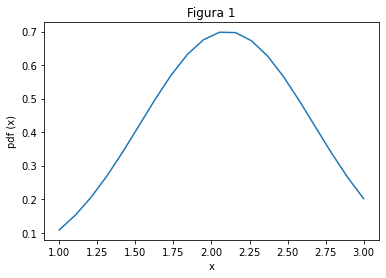

In [16]:
plt.plot(xis, pdf)
plt.title("Figura 1")
plt.xlabel("x")
plt.ylabel("pdf (x)");

**$2.$ Usando a pdf do item $1$, escolha um nível de confiança ($1$ − $\alpha$) para delimitar as regiões de aceitação e regiões críticas, mostrando-as no gráfico da pdf de $\bar{X}$**

O nível de confiança utilizado será de $97\%$, ou seja, $\alpha=0.03$

In [11]:
def CI(muX, sigma, n, alpha=0.05):
    """
    Calcula o intervalo de confiância de uma distribuição normal
    """
    # percentage point da distribuição normal
    # essa parte é ligeiramente diferente da definição,
    # pois zalpha_2 retorna um valor negativo
    zalpha_2  = norm.ppf(alpha/2)
    # limite superior
    ci_d = muX - zalpha_2*sigma/np.sqrt(n)
    # limite inferior
    ci_l = muX + zalpha_2*sigma/np.sqrt(n)
    return ci_l, ci_d

In [20]:
ci = CI(muX=np.mean(X_sample), sigma=np.std(X), alpha=0.03, n=20)

In [21]:
ci

(1.8242398705887617, 2.377098802787978)

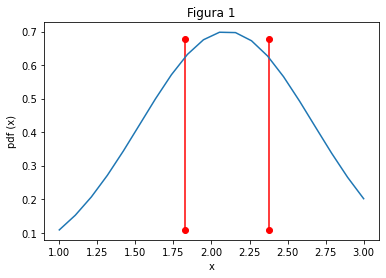

In [22]:
fig, ax = plt.subplots()

lim_inf, lim_sup = [np.min(pdf), np.max(pdf)]
one_x12, one_y12 = [ci[0], ci[0]], [lim_inf, lim_sup-0.02]
two_x12, two_y12 = [ci[1], ci[1]], [lim_inf, lim_sup-0.02]
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o', color='red')
ax.plot(xis, pdf)
ax.set_title("Figura 1")
ax.set_xlabel("x")
ax.set_ylabel("pdf (x)");

**$3.$ Usando as definições da atividade $2$, sugira um teste de hipótese para a média de modo que se tenha probabilidade de erro tipo I igual a $\alpha$ e probabilidade de erro tipo II $\beta = 0.1$. Repita para $\beta = 0.5$**

**$4.$ Altere $N$ para aumentar o poder de teste de $50\%$ para $75\%$ ($\beta = 0.5$ para $\beta = 0.25$). Ilustre a solução graficamente na pdf.**

**$5.$ Sejam os dados $X$ gerados na atividade $1$ do EPC6: cálculo de $50$ médias usando $20$ amostras selecionadas aleatoriamente de $X$. Use o teste z (ztest) para verificar se a variável aleatória 𝑋̅ tem distribuição normal com a média e desvio padrão conhecidos da população $X$. Interprete as saídas do teste: h ($0$ ou $1$), valor-p, CI, zval (estatística de teste), e mostre graficamente estas informações na pdf e complemente com a função normplot**